# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

Dataset Description:

For this lab, I am using the World Population Growth dataset from Kaggle.  
The dataset contains yearly global population statistics from 1951 to 2023.

Key columns used:

 Year: The calendar year (1951–2023). This is the time dimension.
 Population: Total world population in that year.
 Yearly Growth %: Percentage growth of the world population compared to the previous year.
 Number: Absolute change in population (number of people added) compared to the previous year.
 Density (Pop/km2): Average number of people per square kilometer globally. This acts as a spatial intensity measure of how crowded the world is over time.

This dataset allows us to visualize how the size and density of the global population change over time, effectively capturing trends in both space (density across the planet) and time (yearly progression).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

df = pd.read_csv("World Population Growth.csv")


df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Number'] = df['Number'].str.replace(',', '').astype(float)
df['Yearly Growth %'] = df['Yearly Growth %'].str.replace('%', '').astype(float)
df['Density (Pop/km2)'] = df['Density (Pop/km2)'].astype(float)

df.head()


,Year,Population,Yearly Growth %,Number,Density (Pop/km2)
0,1951,2.543130e+09,1.75,43808223.0,17.0
1,1952,2.590271e+09,1.85,47140519.0,17.0
2,1953,2.640279e+09,1.93,50007898.0,18.0
3,1954,2.691979e+09,1.96,51700542.0,18.0
4,1955,2.746072e+09,2.01,54092802.0,18.0


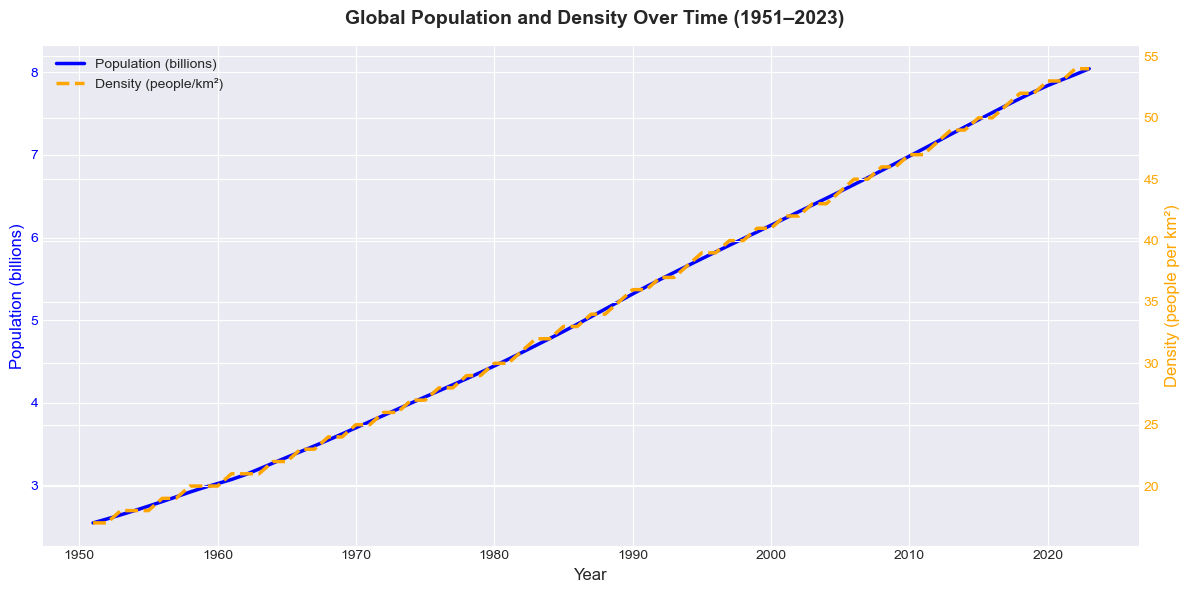

In [4]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df['Year'], df['Population'] / 1e9, color='blue', linewidth=2.5, label='Population (billions)')
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Population (billions)", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Density (Pop/km2)'], color='orange', linewidth=2.5, linestyle='--', label='Density (people/km²)')
ax2.set_ylabel("Density (people per km²)", color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle("Global Population and Density Over Time (1951–2023)", fontsize=14, fontweight='bold')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


Visulization 1 - Interpretation:

This visualization shows that global population has increased steadily from about 2.5 billion in 1951 to over 8 billion in 2023. At the same time, population density (people per km²) has also risen, reflecting how the world is becoming more crowded over the same period. The joint trend over time highlights how not only the number of people is growing, but also how tightly they are distributed across the planet’s land area.


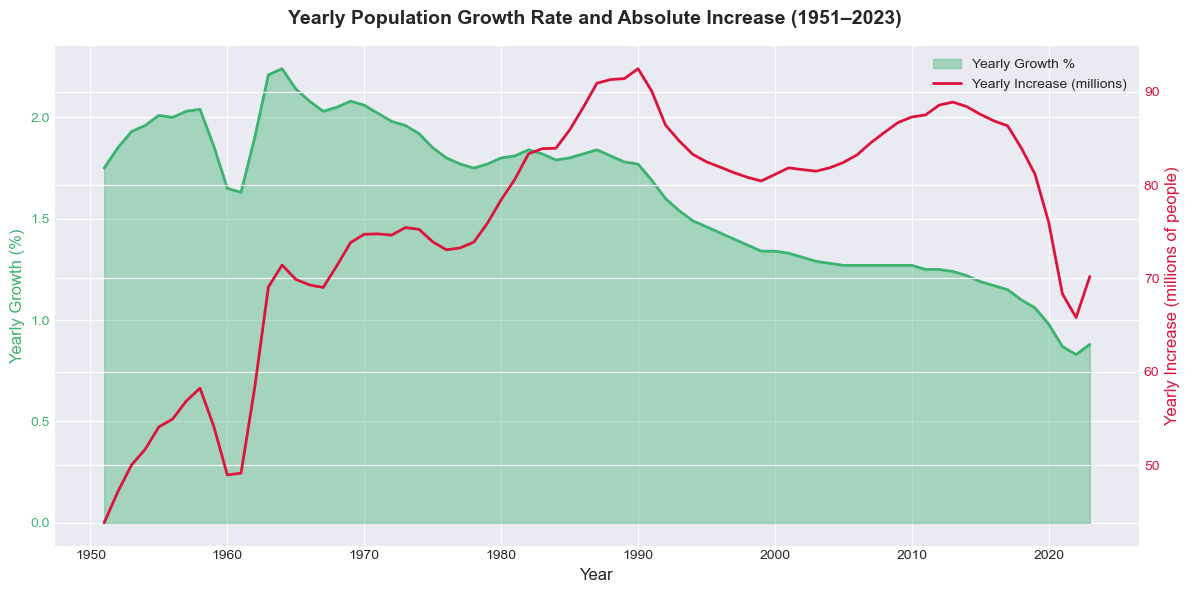

In [5]:
fig, ax1 = plt.subplots(figsize=(12,6))


ax1.fill_between(df['Year'], df['Yearly Growth %'], color='mediumseagreen', alpha=0.4, label='Yearly Growth %')
ax1.plot(df['Year'], df['Yearly Growth %'], color='mediumseagreen', linewidth=2)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Yearly Growth (%)", color='mediumseagreen', fontsize=12)
ax1.tick_params(axis='y', labelcolor='mediumseagreen')

ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Number'] / 1e6, color='crimson', linewidth=2, linestyle='-', label='Yearly Increase (millions)')
ax2.set_ylabel("Yearly Increase (millions of people)", color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

fig.suptitle("Yearly Population Growth Rate and Absolute Increase (1951–2023)", fontsize=14, fontweight='bold')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()


Visualization 2 – Interpretation:

This visualization shows that the percentage growth rate of the world population peaked in the 1960s and 1970s and has been declining since then. However, the absolute number of people added each year remained high for decades, only starting to decrease more recently. This means that even as the growth rate slowed, the world was still adding tens of millions of people per year, reflecting a strong momentum in population expansion over time.


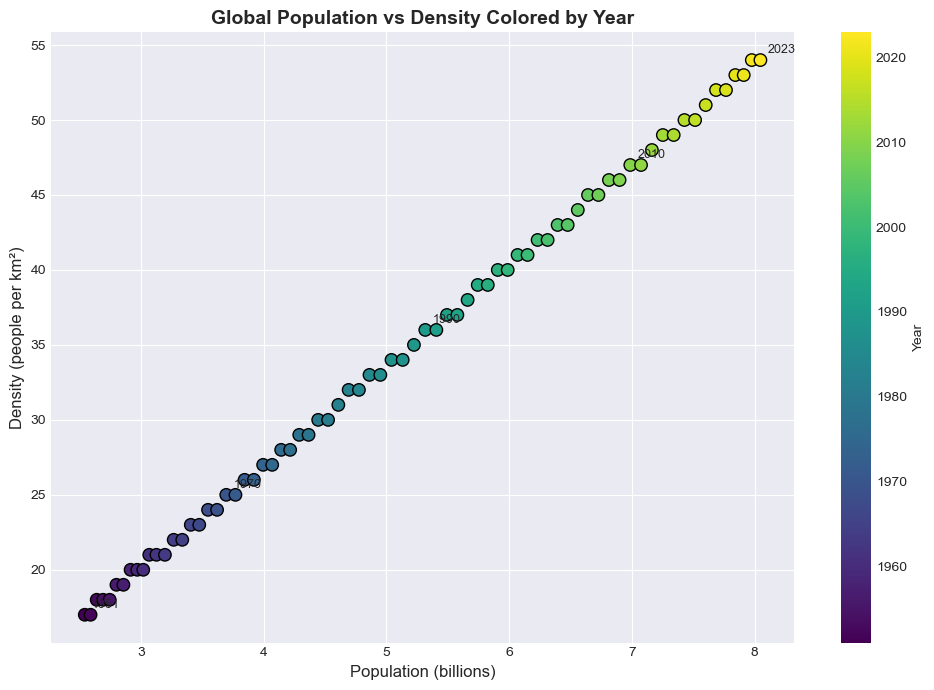

In [6]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    df['Population'] / 1e9,
    df['Density (Pop/km2)'],
    c=df['Year'],
    cmap='viridis',
    s=80,
    edgecolor='black'
)

plt.xlabel("Population (billions)", fontsize=12)
plt.ylabel("Density (people per km²)", fontsize=12)
plt.title("Global Population vs Density Colored by Year", fontsize=14, fontweight='bold')

cbar = plt.colorbar(scatter)
cbar.set_label("Year")

for i in [1951, 1970, 1990, 2010, 2023]:
    row = df[df['Year'] == i].iloc[0]
    plt.annotate(
        str(i),
        (row['Population'] / 1e9, row['Density (Pop/km2)']),
        textcoords="offset points",
        xytext=(5,5),
        fontsize=9
    )

plt.tight_layout()
plt.show()


Visualization 3 – Interpretation:

This scatterplot shows the relationship between total global population and population density, with each point colored by year. The points move from the lower-left to the upper-right over time, indicating that as the world population increases, global density also rises. The color gradient from earlier years (1950s) to recent years (2020s) reveals a clear space–time trajectory: the planet is becoming both more populated and more densely occupied as time progresses.
